# Linear Regression Model to Predict House Prices

# Import requried libraries

In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import dataset

In [5]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Cleaning And Preprocessing

In [6]:
# Checking missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   mainroad          545 non-null    int64
 5   parking           545 non-null    int64
 6   furnishingstatus  545 non-null    int64
dtypes: int64(7)
memory usage: 29.9 KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,mainroad,parking,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.858716,0.693578,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.348635,0.861586,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,1.000000,3.000000,2.000000


In [9]:
# Converting categorical variables to numerical
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
df[categorical_columns] = df[categorical_columns].replace({'yes': 1, 'no': 0})
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [10]:
# Convert 'furnishingstatus' into dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Implementing a Supervised Learning Model

In [12]:
# Prepare Feature Variables and Target Variable
X = df.drop(columns=['price'])
y = df['price']

In [13]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation & Error Handling

In [15]:
# Make prediction
y_pred = model.predict(X_test)

In [17]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nModel Performance:')
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2: ", r2)


Model Performance:
Mean Absolute Error:  970043.4039201637
Mean Squared Error:  1754318687330.6628
R2:  0.6529242642153186


# Predicting House Prices & Testing the Model

In [18]:
# Create a Data Frame to compare actual vs predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\n---Actual vs Predicted House Prices---")
print(comparison_df.head())


---Actual vs Predicted House Prices---
     Actual Price  Predicted Price
316       4060000     5.164654e+06
77        6650000     7.224722e+06
360       3710000     3.109863e+06
90        6440000     4.612075e+06
493       2800000     3.294646e+06


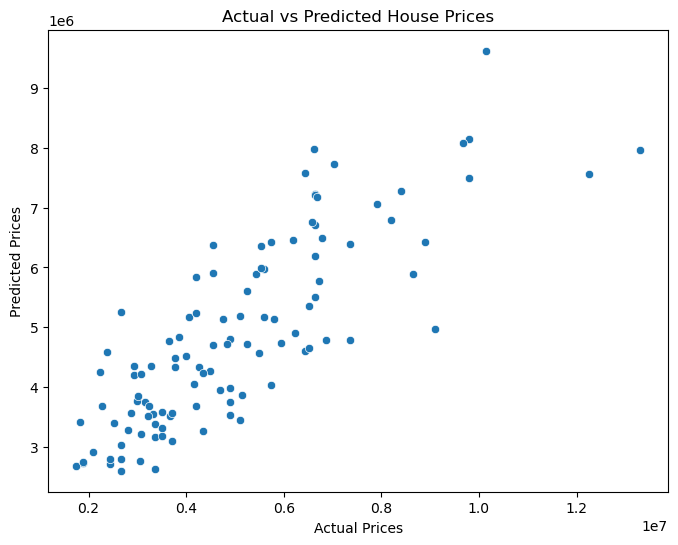

In [24]:
# Visualize actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()